Data set:
https://www.kaggle.com/datasets/blastchar/telco-customer-churn
 
A subscription-based digital service company is facing customer churn, where users cancel their subscriptions after a few months.
Key challenges:
Customer behavior patterns are complex and non-linear
Some customers leave suddenly despite appearing loyal
A single model fails to capture small but important signals
Business wants a high-performance and scalable solution
The company already tried:
Logistic Regression
Decision Tree
Random Forest
…but results are not satisfactory.
 
Tasks:
Load the dataset and study customer attributes such as:
Tenure
Monthly charges
Contract type
Payment method
Identify the target variable and 

explain its business meaning.

Build a baseline classification model using a tree-based approach.
Evaluate its performance using:
Accuracy
Confusion Matrix
Recall for churn customers

Focused customer retention programs
 
Build an ensemble model that improves predictions iteratively.
Train the model using historical customer data.
Observe how the model:
Focuses more on previously misclassified customers
Learns complex patterns gradually
 
Evaluate the model using:
Accuracy
Precision
Recall
F1-Score
Compare the results with the baseline model.
 
Analyze the following:
How many churn customers were correctly identified?
How many loyal customers were wrongly flagged?
Answer:
Is it better to wrongly flag a loyal customer?
Or miss a churn customer?
Which metric should the business prioritize and why?
 
Identify which customer features contribute most to churn prediction.
Explain how understanding feature importance helps business teams.
 

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

from xgboost import XGBClassifier

In [42]:
path = '../../Data_Source/Kaggle/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(path)

In [43]:
df.shape

(7043, 21)

In [44]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [45]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [46]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [47]:
df = df.drop('customerID', axis=1)

# Data Inspection

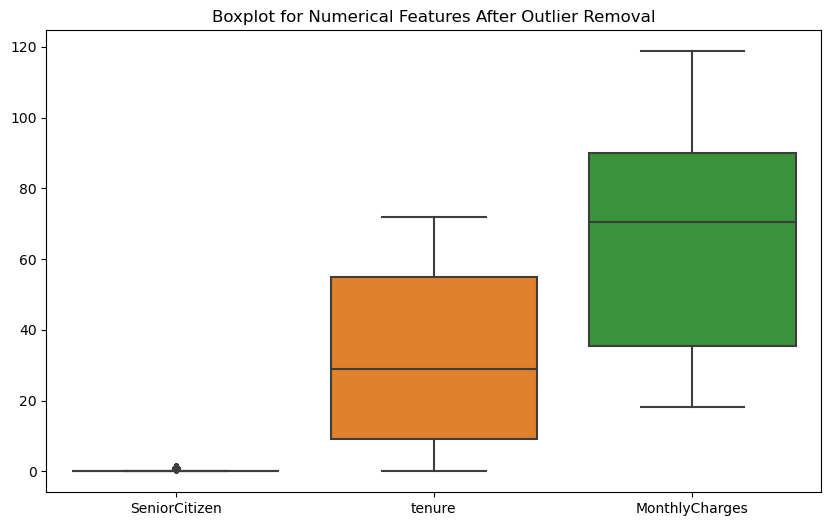

In [48]:
# check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.title('Boxplot for Numerical Features After Outlier Removal')
plt.show()

In [49]:
# deleting the outliers
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

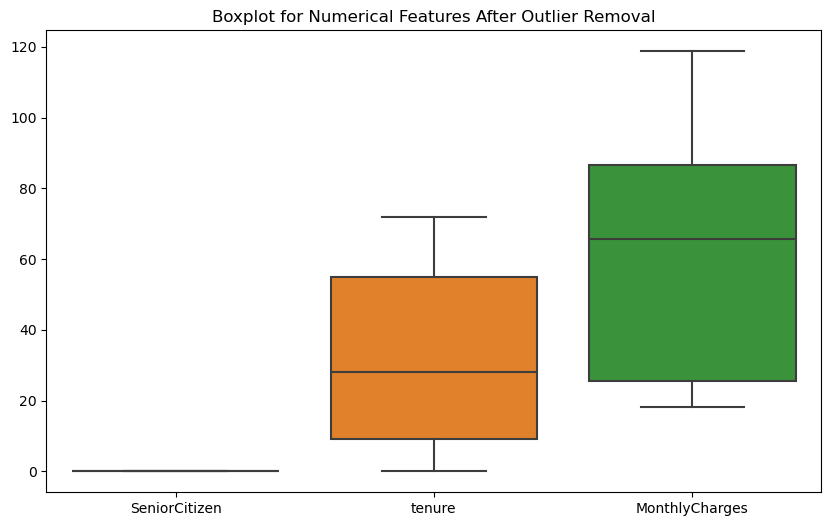

In [50]:
# verify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.title('Boxplot for Numerical Features After Outlier Removal')
plt.show()

# Label Encoding

In [51]:
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

In [52]:
df.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges          int32
Churn                 int32
dtype: object

# Model Building

In [53]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
baseline_model = DecisionTreeClassifier(max_depth=5, random_state=42)
baseline_model.fit(X_train, y_train)
y_pred_base = baseline_model.predict(X_test)

In [56]:
# Evaluate
print("--- Baseline Decision Tree Performance ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_base):.2f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_base))
print("\nRecall for Churn (1):", classification_report(y_test, y_pred_base, output_dict=True)['1']['recall'])

--- Baseline Decision Tree Performance ---
Accuracy: 0.80

Confusion Matrix:
 [[842  74]
 [167  98]]

Recall for Churn (1): 0.36981132075471695


In [57]:
# Build Ensemble Model
ensemble_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ensemble_model.fit(X_train, y_train)
y_pred_ens_ada = ensemble_model.predict(X_test)

print("\n--- Ensemble Model (AdaBoost) Performance ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_ens_ada):.2f}")
print(classification_report(y_test, y_pred_ens_ada))


--- Ensemble Model (AdaBoost) Performance ---
Accuracy: 0.80
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       916
           1       0.59      0.42      0.49       265

    accuracy                           0.80      1181
   macro avg       0.72      0.67      0.68      1181
weighted avg       0.79      0.80      0.79      1181



In [58]:
# XGBC
model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    random_state=42
)

model.fit(
    X_train,
    y_train,
)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [59]:
y_pred_xgb = model.predict(X_test)

In [60]:
print("--- XGBoost Performance Metrics ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_xgb):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

--- XGBoost Performance Metrics ---
Accuracy: 0.8002
F1-Score: 0.4825

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.88       916
           1       0.58      0.42      0.48       265

    accuracy                           0.80      1181
   macro avg       0.71      0.66      0.68      1181
weighted avg       0.78      0.80      0.79      1181

